<div dir="rtl">

# ⚽ ניתוח מונדיאלים בכדורגל  

### פרטי הפרויקט:
- **נושא:** ניתוח סטטיסטי של משחקי המונדיאל משנת 1930 עד 2018  
- **מקור הנתונים:** [FIFA World Cup Dataset - Kaggle](https://www.kaggle.com/datasets/abecklas/fifa-world-cup)  
- **שם הסטודנט:** ארי ארדמן  
- **תאריך:** 11/11/2025  

---

### תיאור כללי של הנושא:
המונדיאל הוא אירוע הספורט הנצפה ביותר בעולם ומתקיים אחת לארבע שנים. מטרת הפרויקט היא לבחון את התפתחות המשחקים, הגולים והישגי הנבחרות לאורך השנים, ולזהות מגמות מעניינות ונתונים חריגים.

---

### מטרות הפרויקט:
1. לבדוק כיצד התפתחו ממוצעי הגולים בכל משחק ממונדיאל למונדיאל.  
2. לבדוק כיצד השתנתה ההפרש הממוצע בין הקבוצות המנצחות והמפסידות (כולל בנפרד ממשחקי רבע, חצי וגמר).  
3. לזהות את הנבחרות שהגיעו הכי הרבה פעמים לגמר ולחצי הגמר.  
4. לבנות דירוג לנבחרות לפי הישגים היסטוריים (גמר, חצי גמר, מקום שלישי ורביעי).  
5. למצוא את שלושת המונדיאלים עם הכי הרבה גולים ועם הכי מעט גולים.  

---

## מבנה הפרויקט  
- **חלק א׳ — שערים והפרשי שערים:** ניתוח ממוצעי שערים והפרשי שערים לכל משחק ומשחקים 0:0, והשוואה בין כל המשחקים לבין משחקי השלבים הסופיים ** 
- **חלק ב׳ — מונדיאלים קיצוניים:** הצגת המונדיאלים עם ממוצעים קיצוניים (הכי הרבה והכי מעט שערים, עפרשי שערים, משחקים 0:0).  
- **חלק ג׳ — דירוג והישגים של נבחרות:** טבלאות של ארבעת המקומות הראשונים בכל מונדיאל, חישוב ניקוד מצטבר ותרשימי עוגה להצגת הישגים היסטוריים.

---

### מקורות הנתונים:
הנתונים נלקחו מאתר Kaggle בקובץ CSV בשם `matches.csv`, הכולל את כל משחקי גביע העולם בין השנים 1930–2018.

---

### כלים וטכניקות:
- **ספריות עיקריות:** pandas, numpy, matplotlib, seaborn  
- **פעולות עיקריות:**  
  - טעינת נתונים מקובץ CSV  
  - ניקוי ועיבוד הנתונים  
  - חישובי ממוצעים וסטטיסטיקות  
  - הצגת נתונים בגרפים ותרשימים  

</div>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sbn

In [2]:
matches = pd.read_csv("matches_1930_2022.csv")

In [3]:
matches.head()

,home_team,away_team,home_score,home_xg,home_penalty,away_score,away_xg,away_penalty,home_manager,home_captain,...,home_penalty_shootout_miss_long,away_penalty_shootout_miss_long,home_red_card,away_red_card,home_yellow_red_card,away_yellow_red_card,home_yellow_card_long,away_yellow_card_long,home_substitute_in_long,away_substitute_in_long
0,Argentina,France,3,3.3,4.0,3,2.2,2.0,Lionel Scaloni,Lionel Messi,...,NaN,"['3|1:1|Kingsley Coman', '5|2:1|Aurélien Tchou...",NaN,NaN,NaN,NaN,"['45+7&rsquor;|2:0|Enzo Fernández', '90+8&rsqu...","['55&rsquor;|2:0|Adrien Rabiot', '87&rsquor;|2...",['64&rsquor;|2:0|Marcos Acuña|for Ángel Di Mar...,['41&rsquor;|2:0|Randal Kolo Muani|for Ousmane...
1,Croatia,Morocco,2,0.7,NaN,1,1.2,NaN,Zlatko Dalić,Luka Modrić,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"['69&rsquor;|2:1|Azzedine Ounahi', '84&rsquor;...",['61&rsquor;|2:1|Nikola Vlašić|for Andrej Kram...,['46&rsquor;|2:1|Ilias Chair|for Abdelhamid Sa...
2,France,Morocco,2,2.0,NaN,0,0.9,NaN,Didier Deschamps,Hugo Lloris,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,['27&rsquor;|1:0|Sofiane Boufal'],['65&rsquor;|1:0|Marcus Thuram|for Olivier Gir...,['21&rsquor;|1:0|Selim Amallah|for Romain Saïs...
3,Argentina,Croatia,3,2.3,NaN,0,0.5,NaN,Lionel Scaloni,Lionel Messi,...,NaN,NaN,NaN,NaN,NaN,NaN,"['68&rsquor;|2:0|Cristian Romero', '71&rsquor;...","['32&rsquor;|0:0|Mateo Kovačić', '32&rsquor;|0...",['62&rsquor;|2:0|Lisandro Martínez|for Leandro...,"['46&rsquor;|2:0|Mislav Oršić|for Borna Sosa',..."
4,Morocco,Portugal,1,1.4,NaN,0,0.9,NaN,Hoalid Regragui,Romain Saïss,...,NaN,NaN,NaN,NaN,Walid Cheddira · 90+3,NaN,"['70&rsquor;|1:0|Achraf Dari', '90+1&rsquor;|1...",['87&rsquor;|1:0|Vitinha'],['57&rsquor;|1:0|Achraf Dari|for Romain Saïss'...,['51&rsquor;|1:0|João Cancelo|for Raphaël Guer...


In [4]:
matches.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 964 entries, 0 to 963
Data columns (total 44 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   home_team                        964 non-null    object 
 1   away_team                        964 non-null    object 
 2   home_score                       964 non-null    int64  
 3   home_xg                          128 non-null    float64
 4   home_penalty                     35 non-null     float64
 5   away_score                       964 non-null    int64  
 6   away_xg                          128 non-null    float64
 7   away_penalty                     35 non-null     float64
 8   home_manager                     964 non-null    object 
 9   home_captain                     644 non-null    object 
 10  away_manager                     964 non-null    object 
 11  away_captain                     644 non-null    object 
 12  Attendance            

In [5]:
matches.describe()

,home_score,home_xg,home_penalty,away_score,away_xg,away_penalty,Attendance,Year
count,964.000000,128.000000,35.000000,964.000000,128.000000,35.000000,964.000000,964.000000
mean,1.776971,1.435938,3.285714,1.044606,1.192187,3.057143,45693.374481,1989.244813
std,1.596676,0.860391,1.226459,1.071233,0.809258,1.136115,22704.131689,24.014409
min,0.000000,0.100000,0.000000,0.000000,0.000000,0.000000,2000.000000,1930.000000
25%,1.000000,0.800000,3.000000,0.000000,0.600000,2.000000,31800.000000,1974.000000
50%,1.000000,1.300000,3.000000,1.000000,1.000000,3.000000,42725.000000,1994.000000
75%,3.000000,1.925000,4.000000,2.000000,1.525000,4.000000,60984.500000,2010.000000
max,10.000000,5.200000,5.000000,7.000000,5.700000,5.000000,173850.000000,2022.000000


** I want to create a table with the following columns, always for all the matches and only for the final_stage matches, to prepare and show the relevant graphs: 
Year, average goals, difference goal average, matches with score: 0-0.
* To do so, I need to calculate such parameters for all the matches and just for the final_stage_matches.

In [6]:
matches['Score'].unique()

array(['(4) 3–3 (2)', '2–1', '2–0', '3–0', '1–0', '1–2', '(4) 1–1 (2)',
       '(3) 2–2 (4)', '(3) 0–0 (0)', '6–1', '(1) 1–1 (3)', '4–1', '3–1',
       '0–2', '2–3', '0–0', '2–4', '0–1', '0–3', '3–3', '1–1', '1–3',
       '3–2', '7–0', '6–2', '4–2', '(3) 1–1 (4)', '(3) 1–1 (2)', '4–3',
       '2–2', '5–2', '5–0', '(2) 0–0 (4)', '1–7', '(4) 0–0 (3)',
       '(5) 1–1 (3)', '1–4', '2–5', '0–4', '4–0', '1–5', '(5) 0–0 (3)',
       '(1) 0–0 (3)', '(0) 0–0 (3)', '6–0', '(3) 0–0 (5)', '8–0',
       '(3) 0–0 (4)', '(4) 2–2 (3)', '(3) 0–0 (2)', '(4) 2–2 (5)',
       '(4) 1–1 (3)', '(2) 0–0 (3)', '(5) 0–0 (4)', '5–1', '(4) 1–1 (5)',
       '(4) 0–0 (1)', '3–4', '(5) 3–3 (4)', '10–1\xa0', '0–7', '9–0',
       '5–3', '4–4', '6–3', '7–3', '5–7', '7–2', '8–3', '7–1', '6–5'],
      dtype=object)

In [7]:
matches['Round'].unique()

array(['Final', 'Third-place match', 'Semi-finals', 'Quarter-finals',
       'Round of 16', 'Group stage', 'Second group stage',
       'First group stage', 'Second round', 'First round',
       'Group stage play-off', 'Final stage'], dtype=object)

In [8]:
partidos_totales = (
    matches
    .groupby('Year')
    .size()
    .reset_index(name='Total_matches')
)

partidos_totales

,Year,Total_matches
0,1930,18
1,1934,17
2,1938,18
3,1950,22
4,1954,26
5,1958,35
6,1962,32
7,1966,32
8,1970,32
9,1974,38


In [9]:
final_stages = [
    'Final',
    'Third-place match',
    'Semi-finals',
    'Final stage'
]

In [10]:
partidos_finales = (
    matches[matches['Round'].isin(final_stages)]
    .groupby('Year')
    .size()
    .reset_index(name='FinalStage_matches')
)

partidos_finales

,Year,FinalStage_matches
0,1930,3
1,1934,4
2,1938,4
3,1950,6
4,1954,4
5,1958,4
6,1962,4
7,1966,4
8,1970,4
9,1974,2


In [11]:
matches.columns

Index(['home_team', 'away_team', 'home_score', 'home_xg', 'home_penalty',
       'away_score', 'away_xg', 'away_penalty', 'home_manager', 'home_captain',
       'away_manager', 'away_captain', 'Attendance', 'Venue', 'Officials',
       'Round', 'Date', 'Score', 'Referee', 'Notes', 'Host', 'Year',
       'home_goal', 'away_goal', 'home_goal_long', 'away_goal_long',
       'home_own_goal', 'away_own_goal', 'home_penalty_goal',
       'away_penalty_goal', 'home_penalty_miss_long', 'away_penalty_miss_long',
       'home_penalty_shootout_goal_long', 'away_penalty_shootout_goal_long',
       'home_penalty_shootout_miss_long', 'away_penalty_shootout_miss_long',
       'home_red_card', 'away_red_card', 'home_yellow_red_card',
       'away_yellow_red_card', 'home_yellow_card_long',
       'away_yellow_card_long', 'home_substitute_in_long',
       'away_substitute_in_long'],
      dtype='object')

In [12]:
matches['total_goals'] = matches['home_score'] + matches['away_score']

In [13]:
promedio_goles_all = matches.groupby(matches['Year'])['total_goals'].mean().reset_index()

In [14]:
promedio_goles_all.rename(columns={'total_goals':'avg_goals_all'}, inplace=True)

In [15]:
promedio_goles_all.head()

,Year,avg_goals_all
0,1930,3.888889
1,1934,4.117647
2,1938,4.666667
3,1950,4.000000
4,1954,5.384615


In [16]:
final_matches = matches[matches['Round'].isin(final_stages)].copy()

In [17]:
final_matches['total_goals'] = final_matches['home_score'] + final_matches['away_score']

In [18]:
promedio_goles_final_stages = final_matches.groupby(matches['Year'])['total_goals'].mean().reset_index()

In [19]:
promedio_goles_final_stages.rename(columns = {'total_goals' : 'avg_goals_final_stages'}, inplace = True)

In [20]:
promedio_goles_final_stages.head()

,Year,avg_goals_final_stages
0,1930,6.666667
1,1934,3.250000
2,1938,5.250000
3,1950,5.166667
4,1954,5.500000


In [21]:
matches['goal_diff'] = abs(matches['home_score'] - matches['away_score'])

In [22]:
avg_goal_diff_all = matches.groupby('Year')['goal_diff'].mean().reset_index()

In [23]:
avg_goal_diff_all.rename(columns={'goal_diff':'avg_goal_diff_all'}, inplace=True)

In [24]:
final_matches['goal_diff'] = abs(final_matches['home_score'] - final_matches['away_score'])

In [25]:
avg_goal_diff_final_stages = final_matches.groupby('Year')['goal_diff'].mean().reset_index()

In [26]:
avg_goal_diff_final_stages.rename(columns={'goal_diff':'avg_goal_diff_final_stages'},inplace=True)

In [27]:
avg_goal_diff_final_stages.head()

,Year,avg_goal_diff_final_stages
0,1930,4.00
1,1934,1.25
2,1938,2.25
3,1950,2.50
4,1954,2.50


In [28]:
avg_goal_diff_all.head()

,Year,avg_goal_diff_all
0,1930,2.666667
1,1934,1.529412
2,1938,2.111111
3,1950,2.272727
4,1954,3.000000


In [29]:
matches['Score'].head()

0    (4) 3–3 (2)
1            2–1
2            2–0
3            3–0
4            1–0
Name: Score, dtype: object

In [30]:
matches ['is_0_0'] = ((matches['home_score']==0) & (matches['away_score']==0)).astype(int)

In [31]:
zero_zero_all = (matches.groupby('Year')['is_0_0'].sum().reset_index().rename(columns={'is_0_0': '0_0_all'}))

In [32]:
final_matches['is_0_0'] = ((final_matches['home_score'] == 0) & (final_matches['away_score'] == 0)).astype(int)

In [33]:
zero_zero_final_stages = final_matches.groupby('Year')['is_0_0'].sum().reset_index().rename(columns={'is_0_0': '0_0_final_stages'})

In [34]:
zero_zero_all.head(20)

,Year,0_0_all
0,1930,0
1,1934,0
2,1938,0
3,1950,0
4,1954,0
5,1958,2
6,1962,4
7,1966,3
8,1970,3
9,1974,5


In [35]:
zero_zero_final_stages.head(20)

,Year,0_0_final_stages
0,1930,0
1,1934,0
2,1938,0
3,1950,0
4,1954,0
5,1958,0
6,1962,0
7,1966,0
8,1970,0
9,1974,0


In [36]:
zero_zero_all['Year'].unique()

array([1930, 1934, 1938, 1950, 1954, 1958, 1962, 1966, 1970, 1974, 1978,
       1982, 1986, 1990, 1994, 1998, 2002, 2006, 2010, 2014, 2018, 2022])

In [37]:
zero_zero_all[zero_zero_all['Year'] == 2014]

,Year,0_0_all
19,2014,7


In [38]:
matches[(matches['Year'] == 2014) & (matches['home_score'] == 0) & (matches['away_score'] == 0)]

,home_team,away_team,home_score,home_xg,home_penalty,away_score,away_xg,away_penalty,home_manager,home_captain,...,away_red_card,home_yellow_red_card,away_yellow_red_card,home_yellow_card_long,away_yellow_card_long,home_substitute_in_long,away_substitute_in_long,total_goals,goal_diff,is_0_0
130,Netherlands,Argentina,0,NaN,2.0,0,NaN,4.0,Louis van Gaal,NaN,...,NaN,NaN,NaN,"['45&rsquor;|0:0|Bruno Martins Indi', '105&rsq...",['49&rsquor;|0:0|Martín Demichelis'],['46&rsquor;|0:0|Daryl Janmaat|for Bruno Marti...,['81&rsquor;|0:0|Rodrigo Palacio|for Enzo Pére...,0,0,1
133,Netherlands,Costa Rica,0,NaN,4.0,0,NaN,3.0,Louis van Gaal,NaN,...,NaN,NaN,NaN,"['64&rsquor;|0:0|Bruno Martins Indi', '111&rsq...","['37&rsquor;|0:0|Júnior Díaz', '52&rsquor;|0:0...","['76&rsquor;|0:0|Jeremain Lens|for Memphis', '...",['66&rsquor;|0:0|Marco Ureña|for Joel Campbell...,0,0,1
151,Ecuador,France,0,NaN,NaN,0,NaN,NaN,Reinaldo Rueda,NaN,...,NaN,NaN,NaN,['83&rsquor;|0:0|Frickson Erazo'],NaN,['63&rsquor;|0:0|Renato Ibarra|for Jefferson M...,['61&rsquor;|0:0|Raphaël Varane|for Mamadou Sa...,0,0,1
152,Costa Rica,England,0,NaN,NaN,0,NaN,NaN,Jorge Luis Pinto,NaN,...,NaN,NaN,NaN,['60&rsquor;|0:0|Giancarlo González'],"['53&rsquor;|0:0|Ross Barkley', '57&rsquor;|0:...",['59&rsquor;|0:0|Christian Bolaños|for Randall...,['62&rsquor;|0:0|Raheem Sterling|for Adam Lall...,0,0,1
171,Japan,Greece,0,NaN,NaN,0,NaN,NaN,Alberto Zaccheroni,NaN,...,NaN,NaN,Kostas Katsouranis · 38,['12&rsquor;|0:0|Makoto Hasebe'],"['27&rsquor;|0:0|Kostas Katsouranis', '55&rsqu...",['46&rsquor;|0:0|Yasuhito Endō|for Makoto Hase...,['35&rsquor;|0:0|Theofanis Gekas|for Kostas Mi...,0,0,1
176,Brazil,Mexico,0,NaN,NaN,0,NaN,NaN,Luiz Felipe Scolari,NaN,...,NaN,NaN,NaN,"['45&rsquor;|0:0|Ramires', '79&rsquor;|0:0|Thi...","['59&rsquor;|0:0|Paul Aguilar', '62&rsquor;|0:...","['46&rsquor;|0:0|Bernard|for Ramires', '68&rsq...",['74&rsquor;|0:0|Javier Hernández|for Oribe Pe...,0,0,1
179,IR Iran,Nigeria,0,NaN,NaN,0,NaN,NaN,Carlos Queiroz,NaN,...,NaN,NaN,NaN,['75&rsquor;|0:0|Andranik Teymourian'],NaN,['78&rsquor;|0:0|Alireza Jahanbakhsh|for Ashka...,['29&rsquor;|0:0|Joseph Yobo|for Godfrey Oboab...,0,0,1


In [39]:
tabla_parte1 = partidos_totales.copy()

In [40]:
tabla_parte1 = tabla_parte1.merge(partidos_finales, on='Year', how='left')
tabla_parte1 = tabla_parte1.merge(promedio_goles_all, on='Year', how='left')
tabla_parte1 = tabla_parte1.merge(promedio_goles_final_stages, on='Year', how='left')
tabla_parte1 = tabla_parte1.merge(avg_goal_diff_all, on='Year', how='left')
tabla_parte1 = tabla_parte1.merge(avg_goal_diff_final_stages, on='Year', how='left')
tabla_parte1 = tabla_parte1.merge(zero_zero_all, on='Year', how='left')
tabla_parte1 = tabla_parte1.merge(zero_zero_final_stages, on='Year', how='left')

In [41]:
tabla_parte1.head()

,Year,Total_matches,FinalStage_matches,avg_goals_all,avg_goals_final_stages,avg_goal_diff_all,avg_goal_diff_final_stages,0_0_all,0_0_final_stages
0,1930,18,3,3.888889,6.666667,2.666667,4.00,0,0
1,1934,17,4,4.117647,3.250000,1.529412,1.25,0,0
2,1938,18,4,4.666667,5.250000,2.111111,2.25,0,0
3,1950,22,6,4.000000,5.166667,2.272727,2.50,0,0
4,1954,26,4,5.384615,5.500000,3.000000,2.50,0,0


In [42]:
tabla_parte1["avg_goal_diff_all"]

0     2.666667
1     1.529412
2     2.111111
3     2.272727
4     3.000000
5     1.542857
6     1.531250
7     1.531250
8     1.531250
9     1.657895
10    1.473684
11    1.384615
12    1.423077
13    1.211538
14    1.365385
15    1.296875
16    1.296875
17    1.421875
18    1.234375
19    1.421875
20    1.296875
21    1.406250
Name: avg_goal_diff_all, dtype: float64

In [43]:
tabla_parte1.columns

Index(['Year', 'Total_matches', 'FinalStage_matches', 'avg_goals_all',
       'avg_goals_final_stages', 'avg_goal_diff_all',
       'avg_goal_diff_final_stages', '0_0_all', '0_0_final_stages'],
      dtype='object')

In [44]:
import matplotlib.pyplot as plt

In [45]:
global_avg_all = promedio_goles_all['avg_goals_all'].mean()
global_avg_final_stages = promedio_goles_final_stages['avg_goals_final_stages'].mean()

In [46]:
df_plot = promedio_goles_all.merge(promedio_goles_final_stages, on='Year')

In [47]:
plt.figure(figsize=(12,6))

<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

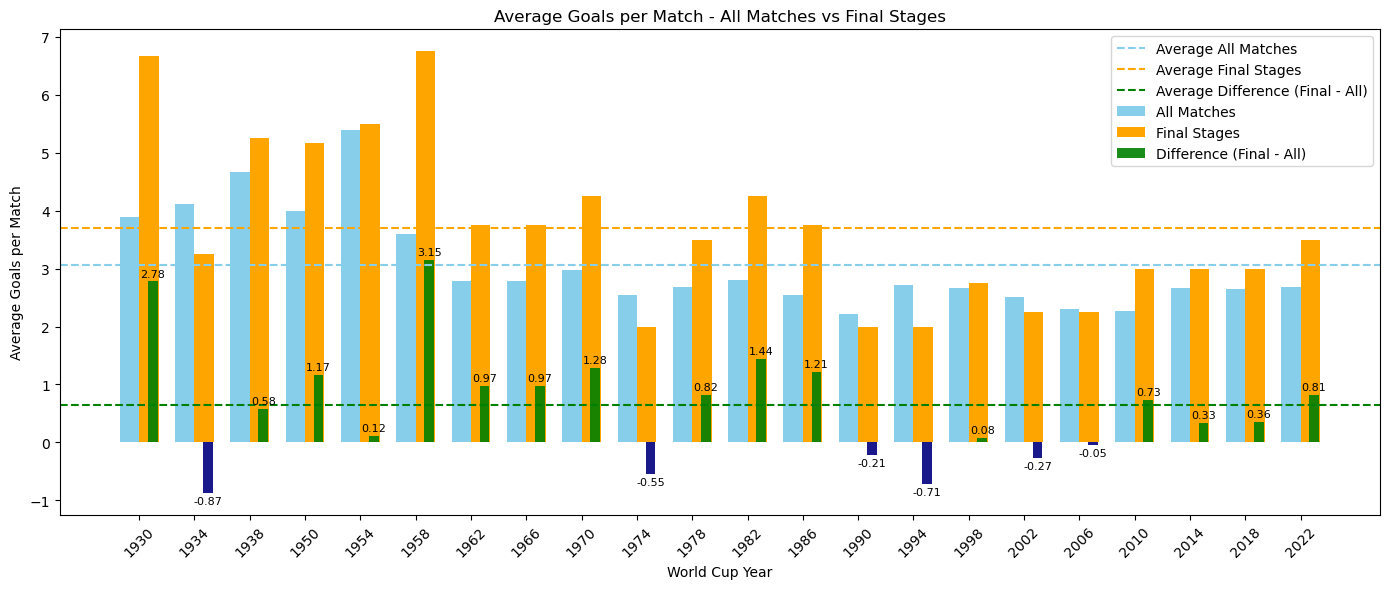

In [48]:
import matplotlib.pyplot as plt
import numpy as np

# Definir datos
years = tabla_parte1['Year']
avg_all = tabla_parte1['avg_goals_all']
avg_final = tabla_parte1['avg_goals_final_stages']

# Posiciones de las barras
x = np.arange(len(years))
width = 0.35  # ancho de las barras principales

plt.figure(figsize=(14,6))

# --- Barras principales ---
plt.bar(x - width/2, avg_all, width, color='skyblue', label='All Matches')
plt.bar(x + width/2, avg_final, width, color='orange', label='Final Stages')

# --- Líneas punteadas de promedio general con colores de las barras ---
plt.axhline(y=avg_all.mean(), color='skyblue', linestyle='--', label='Average All Matches')
plt.axhline(y=avg_final.mean(), color='orange', linestyle='--', label='Average Final Stages')

# --- Barra de diferencia ---
diff = avg_final - avg_all
diff_colors = ['green' if d > 0 else 'navy' for d in diff]

# Posición: más a la derecha de Final Stages
diff_pos = x + width/2 + width*0.2
plt.bar(diff_pos, diff, width*0.5, color=diff_colors, label='Difference (Final - All)', alpha=0.9)

# Labels de diferencia
for xi, di in zip(diff_pos, diff):
    plt.text(xi, di + 0.05*np.sign(di), f'{di:.2f}', ha='center', va='bottom' if di>0 else 'top', fontsize=8)

# --- Línea punteada de promedio global de diferencia ---
plt.axhline(y=diff.mean(), color='green', linestyle='--', label='Average Difference (Final - All)')

# --- Etiquetas y título ---
plt.xticks(x, years, rotation=45)
plt.ylabel('Average Goals per Match')
plt.xlabel('World Cup Year')
plt.title('Average Goals per Match - All Matches vs Final Stages')
plt.legend()
plt.tight_layout()
plt.show()

In [49]:
years = tabla_parte1['Year']
avg_diff_all = tabla_parte1['avg_goal_diff_all']
avg_diff_final_stage = tabla_parte1['avg_goal_diff_final_stages']


In [50]:
x = np.arange(len(years))
width = 0.35

In [51]:
plt.figure(figsize=(20,3))

<Figure size 2000x300 with 0 Axes>

<Figure size 2000x300 with 0 Axes>

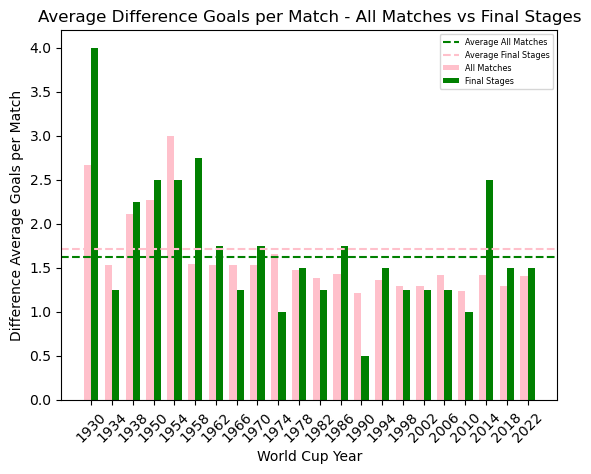

In [52]:
plt.bar(x - width/2, avg_diff_all, width, color='pink', label='All Matches')
plt.bar(x + width/2, avg_diff_final_stage, width, color='green', label='Final Stages')
plt.axhline(y=avg_diff_all.mean(), color='green', linestyle='--', label='Average All Matches')
plt.axhline(y=avg_diff_final_stage.mean(), color='pink', linestyle='--', label='Average Final Stages')
diff_between_final_stages_to_all = avg_diff_final_stage - avg_diff_all

# --- Etiquetas y título ---
plt.xticks(x, years, rotation=45)
plt.ylabel('Difference Average Goals per Match')
plt.xlabel('World Cup Year')
plt.title('Average Difference Goals per Match - All Matches vs Final Stages')
plt.legend(fontsize='xx-small')
plt.show()



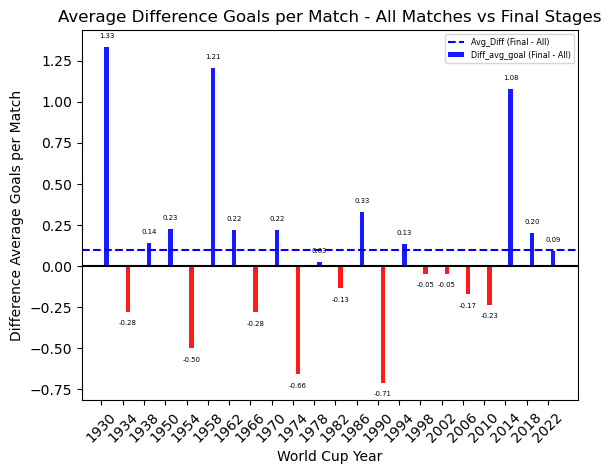

In [53]:
plt.axhline(y=0, color='black')
diff_between_final_stages_to_all = avg_diff_final_stage - avg_diff_all
diff_colors = ['blue' if d > 0 else 'red' for d in diff_between_final_stages_to_all]
diff_pos = x + width/2 + width*0.2
plt.bar(diff_pos, diff_between_final_stages_to_all, width*0.6, color=diff_colors, label='Diff_avg_goal (Final - All)', alpha=0.9)
# Labels de diferencia
for xi, di in zip(diff_pos, diff_between_final_stages_to_all):
    plt.text(xi, di + 0.05*np.sign(di), f'{di:.2f}', ha='center', va='bottom' if di>0 else 'top', fontsize=5)
y_diff_value = diff_between_final_stages_to_all.mean()
if y_diff_value > 0 :
    color_line = "blue"
else:
    color_line = "red"
plt.axhline(y=y_diff_value, color=color_line, linestyle='--', label='Avg_Diff (Final - All)')
# --- Etiquetas y título ---
plt.xticks(x, years, rotation=45)
plt.ylabel('Difference Average Goals per Match')
plt.xlabel('World Cup Year')
plt.title('Average Difference Goals per Match - All Matches vs Final Stages')
plt.legend(fontsize='xx-small')
plt.show()

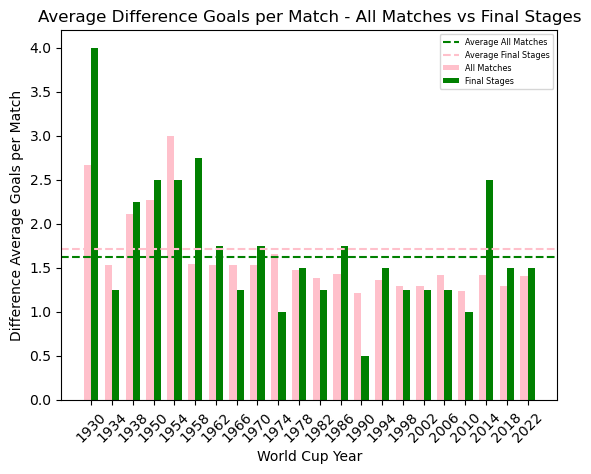

In [54]:
plt.bar(x - width/2, avg_diff_all, width, color='pink', label='All Matches')
plt.bar(x + width/2, avg_diff_final_stage, width, color='green', label='Final Stages')
plt.axhline(y=avg_diff_all.mean(), color='green', linestyle='--', label='Average All Matches')
plt.axhline(y=avg_diff_final_stage.mean(), color='pink', linestyle='--', label='Average Final Stages')
diff_between_final_stages_to_all = avg_diff_final_stage - avg_diff_all

# --- Etiquetas y título ---
plt.xticks(x, years, rotation=45)
plt.ylabel('Difference Average Goals per Match')
plt.xlabel('World Cup Year')
plt.title('Average Difference Goals per Match - All Matches vs Final Stages')
plt.legend(fontsize='xx-small')
plt.show()

In [55]:
years = tabla_parte1['Year']
zero_zero_all = tabla_parte1['0_0_all']
zero_zero_porcentage = (tabla_parte1 ['0_0_all']/partidos_totales['Total_matches'])*100

In [56]:
zero_zero_porcentage

0      0.000000
1      0.000000
2      0.000000
3      0.000000
4      0.000000
5      5.714286
6     12.500000
7      9.375000
8      9.375000
9     13.157895
10    15.789474
11    13.461538
12     7.692308
13     9.615385
14     5.769231
15     6.250000
16     4.687500
17    10.937500
18    10.937500
19    10.937500
20     1.562500
21    10.937500
dtype: float64

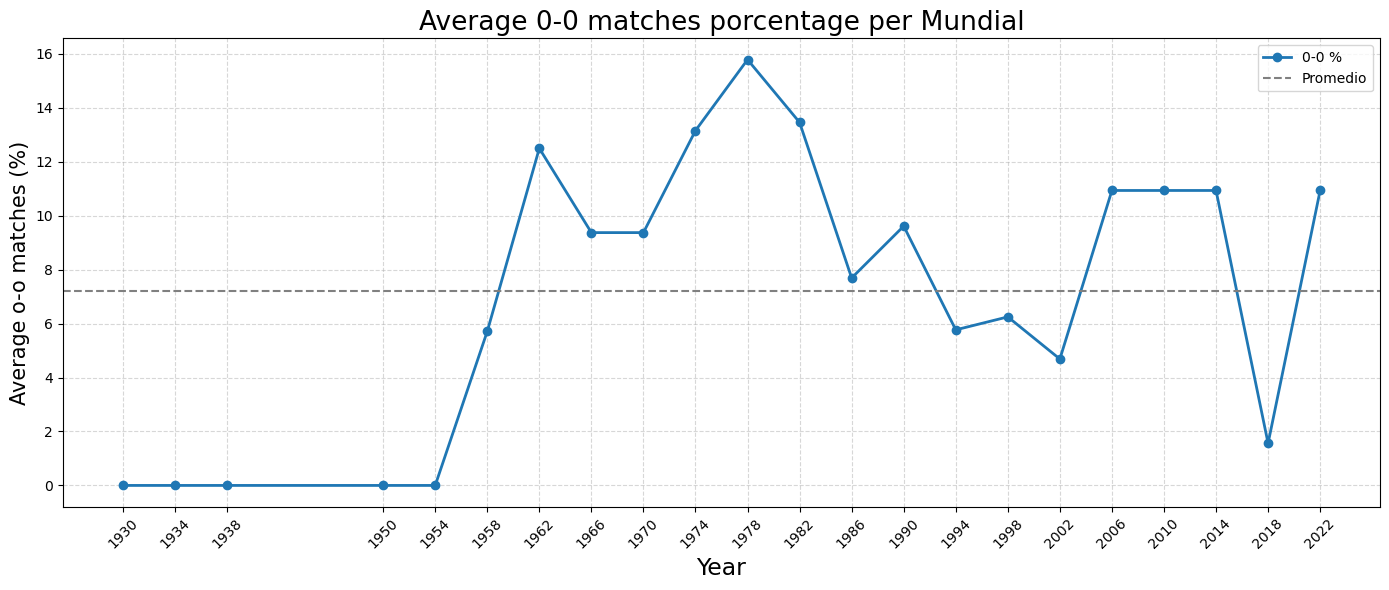

In [57]:
import matplotlib.pyplot as plt

# Eje X y serie a graficar
years = tabla_parte1['Year']
zero_zero_percentage = (tabla_parte1['0_0_all'] / partidos_totales['Total_matches']) * 100

plt.figure(figsize=(14,6))

# Línea principal
plt.plot(years, zero_zero_percentage, marker='o', linewidth=2, label='0-0 %')

# Línea horizontal del promedio
plt.axhline(y=zero_zero_percentage.mean(),
            linestyle='--',
            color='gray',
            linewidth=1.5,
            label='Promedio')

# Labels y estética
plt.title('Average 0-0 matches porcentage per Mundial', fontsize=19)
plt.xlabel('Year', fontsize=17)
plt.ylabel('Average o-o matches (%)', fontsize=15)
plt.xticks(years, rotation=45)
plt.grid(True, linestyle='--', alpha=0.5)
plt.legend()

plt.tight_layout()
plt.show()

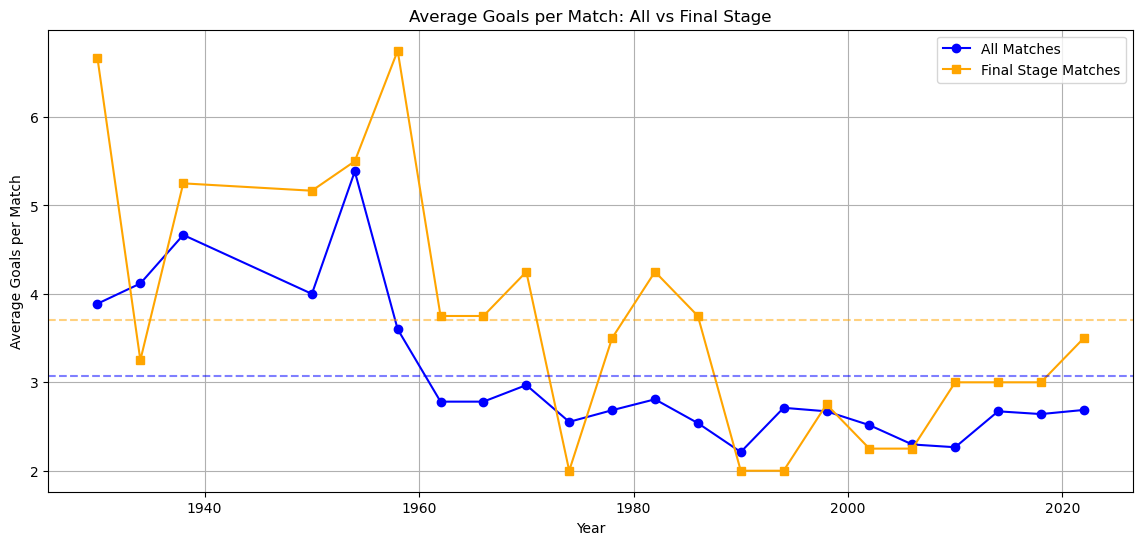

In [58]:
import matplotlib.pyplot as plt


# Configuración del gráfico
plt.figure(figsize=(14,6))

# Graficar las líneas
plt.plot(years, avg_all, marker='o', label='All Matches', color='blue')
plt.plot(years, avg_final, marker='s', label='Final Stage Matches', color='orange')

# Agregar línea de referencia (por ejemplo promedio general)
plt.axhline(y=avg_all.mean(), color='blue', linestyle='--', alpha=0.5)
plt.axhline(y=avg_final.mean(), color='orange', linestyle='--', alpha=0.5)

# Etiquetas y título
plt.xlabel('Year')
plt.ylabel('Average Goals per Match')
plt.title('Average Goals per Match: All vs Final Stage')
plt.legend()
plt.grid(True)
plt.show()

 חלק ב

In [59]:
# --- Selección de valores pedidos ---

tabla_parte2=tabla_parte1.copy()
tabla_parte2['Year'] = tabla_parte2['Year'].astype(int)

# Top 3 y Bottom 3 de promedio de goles
top3_goals = tabla_parte2.nlargest(3, 'avg_goals_all')[['Year', 'avg_goals_all']]
bottom3_goals = tabla_parte2.nsmallest(3, 'avg_goals_all')[['Year', 'avg_goals_all']]

# Mayor y menor diferencia promedio de goles
max_diff = tabla_parte2.loc[tabla_parte2['avg_goal_diff_all'].idxmax(), ['Year', 'avg_goal_diff_all']]
min_diff = tabla_parte2.loc[tabla_parte2['avg_goal_diff_all'].idxmin(), ['Year', 'avg_goal_diff_all']]

# Mayor y menor % de 0–0
max_zero = tabla_parte2.loc[tabla_parte2['0_0_all'].idxmax(), ['Year', '0_0_all']]
min_zero = tabla_parte2.loc[tabla_parte2['0_0_all'].idxmin(), ['Year', '0_0_all']]

# Mostramos todo junto
top3_goals, bottom3_goals, max_diff, min_diff, max_zero, min_zero

(   Year  avg_goals_all
 4  1954       5.384615
 2  1938       4.666667
 1  1934       4.117647,
     Year  avg_goals_all
 13  1990       2.211538
 18  2010       2.265625
 17  2006       2.296875,
 Year                 1954.0
 avg_goal_diff_all       3.0
 Name: 4, dtype: float64,
 Year                 1990.000000
 avg_goal_diff_all       1.211538
 Name: 13, dtype: float64,
 Year       1982.0
 0_0_all       7.0
 Name: 11, dtype: float64,
 Year       1930.0
 0_0_all       0.0
 Name: 0, dtype: float64)

In [60]:
tabla_parte1.columns

Index(['Year', 'Total_matches', 'FinalStage_matches', 'avg_goals_all',
       'avg_goals_final_stages', 'avg_goal_diff_all',
       'avg_goal_diff_final_stages', '0_0_all', '0_0_final_stages'],
      dtype='object')

In [61]:
df_sorted = tabla_parte1.sort_values('avg_goals_all').copy()

In [62]:
bottom3_avg = df_sorted.head(3)
top3_avg = df_sorted.tail(3)

In [63]:
df_sorted.head(10)

,Year,Total_matches,FinalStage_matches,avg_goals_all,avg_goals_final_stages,avg_goal_diff_all,avg_goal_diff_final_stages,0_0_all,0_0_final_stages
13,1990,52,4,2.211538,2.00,1.211538,0.50,5,0
18,2010,64,4,2.265625,3.00,1.234375,1.00,7,0
17,2006,64,4,2.296875,2.25,1.421875,1.25,7,0
16,2002,64,4,2.515625,2.25,1.296875,1.25,3,0
12,1986,52,4,2.538462,3.75,1.423077,1.75,4,0
9,1974,38,2,2.552632,2.00,1.657895,1.00,5,0
20,2018,64,4,2.640625,3.00,1.296875,1.50,1,0
15,1998,64,4,2.671875,2.75,1.296875,1.25,4,0
19,2014,64,4,2.671875,3.00,1.421875,2.50,7,1
10,1978,38,2,2.684211,3.50,1.473684,1.50,6,0


In [64]:
df_sorted.columns

Index(['Year', 'Total_matches', 'FinalStage_matches', 'avg_goals_all',
       'avg_goals_final_stages', 'avg_goal_diff_all',
       'avg_goal_diff_final_stages', '0_0_all', '0_0_final_stages'],
      dtype='object')

In [65]:
bottom3_avg = df_sorted.head(3)  
top3_avg = df_sorted.tail(3) 

In [66]:
print("Bottom 3 Avg Goals (All Matches):")
print(bottom3_avg[['Year','avg_goals_all']])

Bottom 3 Avg Goals (All Matches):
    Year  avg_goals_all
13  1990       2.211538
18  2010       2.265625
17  2006       2.296875


In [67]:
print("\nTop 3 Avg Goals (All Matches):")
print(top3_avg[['Year','avg_goals_all']])


Top 3 Avg Goals (All Matches):
   Year  avg_goals_all
1  1934       4.117647
2  1938       4.666667
4  1954       5.384615


In [68]:
top_bottom = pd.concat([top3_avg, bottom3_avg])

In [69]:
top_bottom = top_bottom.sort_values('Year').reset_index(drop=True)

In [70]:
colors = ['skyblue' if year in top3_avg['Year'].values else 'orange' for year in top_bottom['Year']]

In [71]:
overall_mean = tabla_parte1['avg_goals_all'].mean()

In [72]:
all_years = sorted(tabla_parte1['Year'].tolist()) 
x_positions = np.arange(len(all_years))

In [73]:
top3_values = [top3_avg.loc[top3_avg['Year']==y, 'avg_goals_all'].values[0] if y in top3_avg['Year'].values else 0 for y in all_years]
bottom3_values = [bottom3_avg.loc[bottom3_avg['Year']==y, 'avg_goals_all'].values[0] if y in bottom3_avg['Year'].values else 0 for y in all_years]

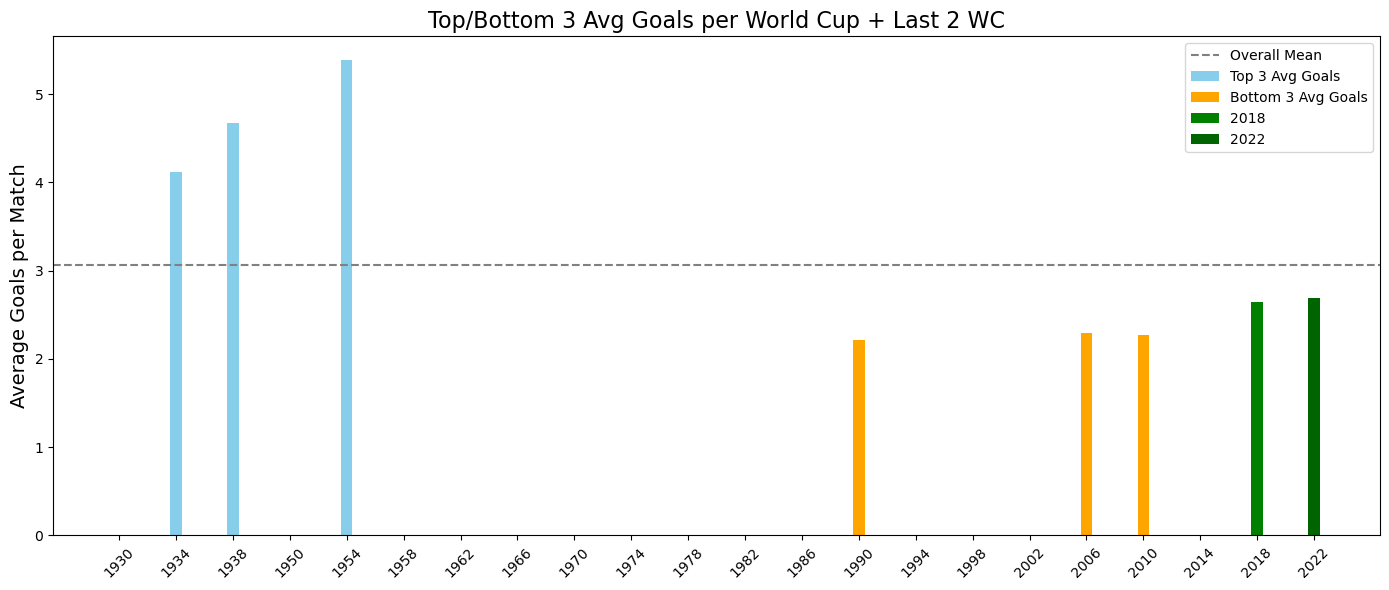

In [74]:
plt.figure(figsize=(14,6))
width = 0.2

# Top 3
plt.bar(x_positions, top3_values, color='skyblue', width=width, label='Top 3 Avg Goals')

# Bottom 3
plt.bar(x_positions, bottom3_values, color='orange', width=width, label='Bottom 3 Avg Goals')
last_two = tabla_parte1.sort_values('Year').tail(2)
x_last2 = [all_years.index(last_two['Year'].iloc[0]), all_years.index(last_two['Year'].iloc[1])]

plt.bar(x_last2[0], last_two['avg_goals_all'].iloc[0], color='green', width=width, label=f"{last_two['Year'].iloc[0]}")
plt.bar(x_last2[1], last_two['avg_goals_all'].iloc[1], color='darkgreen', width=width, label=f"{last_two['Year'].iloc[1]}")
overall_mean = tabla_parte1['avg_goals_all'].mean()
plt.axhline(y=overall_mean, color='gray', linestyle='--', linewidth=1.5, label='Overall Mean')
plt.xticks(x_positions, [str(y) for y in all_years], rotation=45)
plt.ylabel('Average Goals per Match', fontsize=14)
plt.title('Top/Bottom 3 Avg Goals per World Cup + Last 2 WC', fontsize=16)
plt.legend()
plt.tight_layout()
plt.show()

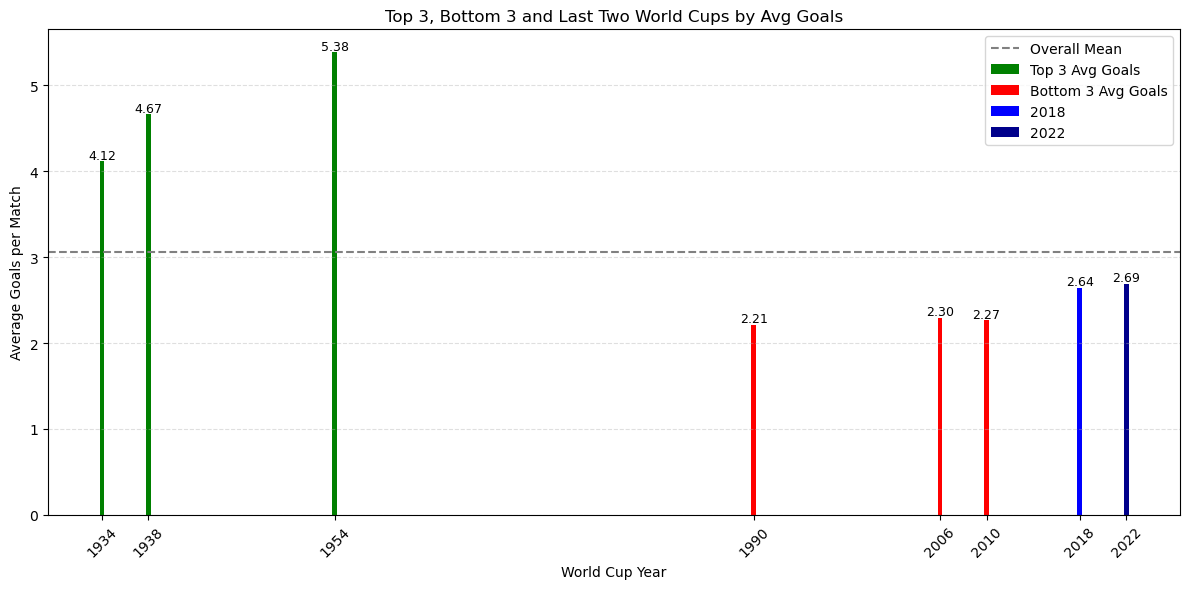

In [75]:
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
import pandas as pd

plt.figure(figsize=(12,6))
width = 0.4  # ancho de las barras

# --- Barras Top 3 ---
plt.bar(
    top3_avg['Year'], 
    top3_avg['avg_goals_all'], 
    width=width, 
    color='green', 
    label='Top 3 Avg Goals'
)

# --- Barras Bottom 3 ---
plt.bar(
    bottom3_avg['Year'], 
    bottom3_avg['avg_goals_all'], 
    width=width, 
    color='red', 
    label='Bottom 3 Avg Goals'
)

# --- Barras últimos dos mundiales ---
plt.bar(
    last_two['Year'].iloc[0], 
    last_two['avg_goals_all'].iloc[0], 
    width=width, 
    color='blue', 
    label=f"{last_two['Year'].iloc[0]}"
)
plt.bar(
    last_two['Year'].iloc[1], 
    last_two['avg_goals_all'].iloc[1], 
    width=width, 
    color='darkblue', 
    label=f"{last_two['Year'].iloc[1]}"
)

# --- Línea punteada del promedio histórico ---
overall_mean = tabla_parte1['avg_goals_all'].mean()
plt.axhline(y=overall_mean, color='gray', linestyle='--', linewidth=1.5, label='Overall Mean')

# --- Valores sobre cada barra ---
all_values = list(top3_avg['avg_goals_all']) + list(bottom3_avg['avg_goals_all']) + list(last_two['avg_goals_all'])
all_years = list(top3_avg['Year']) + list(bottom3_avg['Year']) + list(last_two['Year'])
for x, y in zip(all_years, all_values):
    plt.text(x, y + 0.03, f"{y:.2f}", ha='center', fontsize=9)

# --- Configuración final ---
plt.xticks(all_years, all_years, rotation=45)
plt.xlabel("World Cup Year")
plt.ylabel("Average Goals per Match")
plt.title("Top 3, Bottom 3 and Last Two World Cups by Avg Goals")
plt.legend(loc='upper right')
plt.grid(axis='y', linestyle='--', alpha=0.4)
plt.tight_layout()
plt.show()

##Graph about goal differences

In [76]:
last_two = tabla_parte1[tabla_parte1['Year'].isin([2018, 2022])]

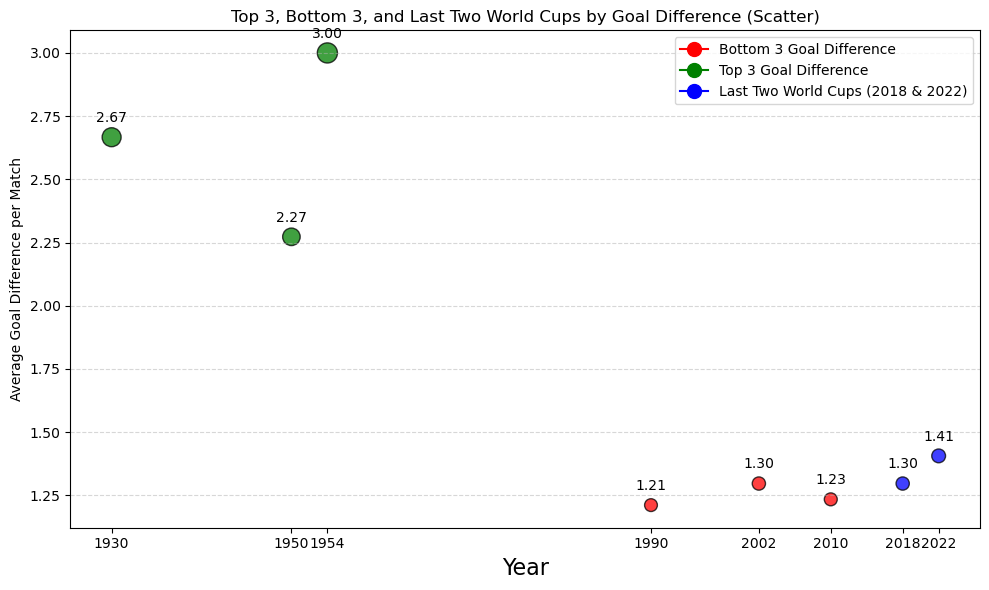

In [77]:
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
import pandas as pd

# --- Ordenar y seleccionar Top 3 y Bottom 3 ---
df_sorted = tabla_parte1.sort_values("avg_goal_diff_all")

bottom3_diff = df_sorted.head(3)
top3_diff = df_sorted.tail(3)

# Excluir últimos dos mundiales para evitar duplicado
bottom3_diff = bottom3_diff[~bottom3_diff['Year'].isin([2018, 2022])]
top3_diff = top3_diff[~top3_diff['Year'].isin([2018, 2022])]

# Últimos dos mundiales
last_two = tabla_parte1[tabla_parte1['Year'].isin([2018, 2022])]

# Dataset combinado final
df_lollipop = pd.concat([bottom3_diff, top3_diff, last_two])

# Colores:
colors = (
    ['red'] * len(bottom3_diff) +      # Bottom 3
    ['green'] * len(top3_diff) +       # Top 3
    ['blue'] * len(last_two)           # Últimos dos mundiales
)

# Leyenda manual
legend_elements = [
    Line2D([0], [0], marker='o', color='red', markerfacecolor='red', markersize=10,
           label='Bottom 3 Goal Difference'),
    Line2D([0], [0], marker='o', color='green', markerfacecolor='green', markersize=10,
           label='Top 3 Goal Difference'),
    Line2D([0], [0], marker='o', color='blue', markerfacecolor='blue', markersize=10,
           label='Last Two World Cups (2018 & 2022)')
]

# ------------------ GRÁFICO -------------------
plt.figure(figsize=(10,6))

# Tamaño proporcional
sizes = df_lollipop['avg_goal_diff_all'] * 70

# Scatter
plt.scatter(df_lollipop['Year'], df_lollipop['avg_goal_diff_all'],
            s=sizes, c=colors, alpha=0.75, edgecolors='black')

# Etiquetas por encima de cada punto
for x, y in zip(df_lollipop['Year'], df_lollipop['avg_goal_diff_all']):
    plt.text(x, y + 0.06, f"{y:.2f}", ha='center', fontsize=10)

# Eje X
plt.xticks(df_lollipop['Year'], df_lollipop['Year'].astype(int))

plt.xlabel("Year", fontsize=16)
plt.ylabel("Average Goal Difference per Match")
plt.title("Top 3, Bottom 3, and Last Two World Cups by Goal Difference (Scatter)")

# 🟦 >>> Aquí está la modificación solicitada <<<
plt.legend(handles=legend_elements, loc='upper right')

plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

##Graph about 0-0 matches porcentage

In [78]:
zero_zero_percentage = (tabla_parte1['0_0_all'] / tabla_parte1['Total_matches']) * 100
tabla_parte1['pct_zero_zero'] = zero_zero_percentage

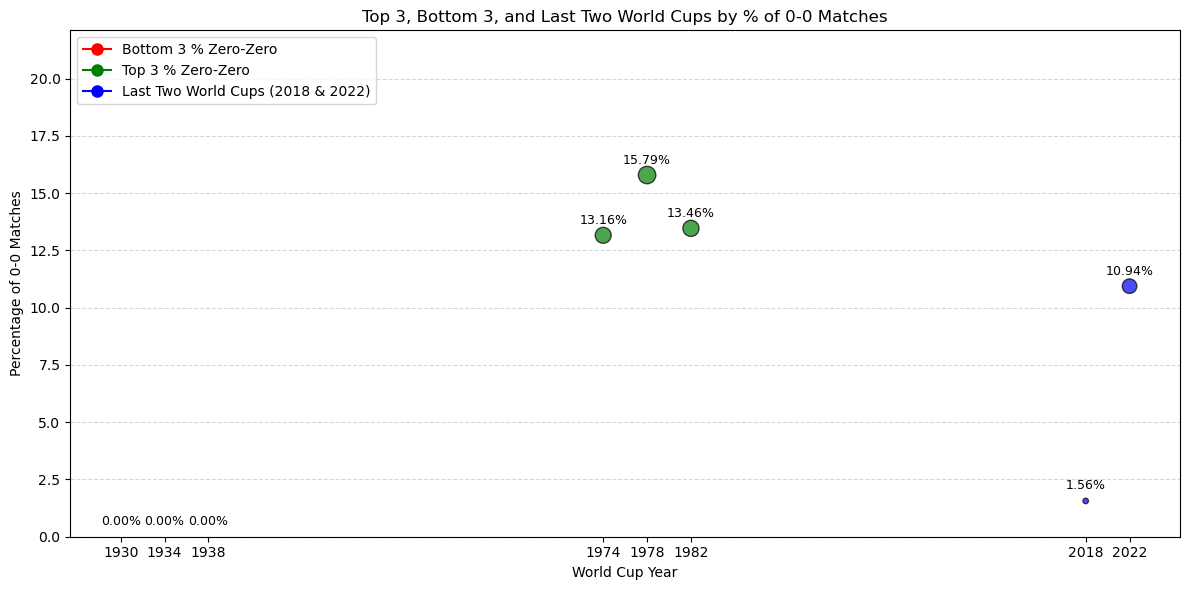

In [79]:
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D

# Seleccionar Top 3 y Bottom 3 según pct_zero_zero
df_sorted = tabla_parte1.sort_values("pct_zero_zero")
bottom3_zero = df_sorted.head(3)
top3_zero = df_sorted.tail(3)

# Últimos dos mundiales
last_two = tabla_parte1[tabla_parte1['Year'].isin([2018, 2022])]

# Combinar todos
df_lollipop = pd.concat([bottom3_zero, top3_zero, last_two])

# Colores
colors = (
    ['red'] * len(bottom3_zero) +
    ['green'] * len(top3_zero) +
    ['blue'] * len(last_two)
)

# Leyenda manual
legend_elements = [
    Line2D([0], [0], marker='o', color='red', label='Bottom 3 % Zero-Zero',
           markerfacecolor='red', markersize=8),
    Line2D([0], [0], marker='o', color='green', label='Top 3 % Zero-Zero',
           markerfacecolor='green', markersize=8),
    Line2D([0], [0], marker='o', color='blue', label='Last Two World Cups (2018 & 2022)',
           markerfacecolor='blue', markersize=8)
]

# ------------------ Gráfico -------------------
plt.figure(figsize=(12,6))

# Tamaño de burbujas proporcional, reducido
sizes = df_lollipop['pct_zero_zero'] * 10

# Scatter
plt.scatter(df_lollipop['Year'], df_lollipop['pct_zero_zero'],
            s=sizes, c=colors, alpha=0.7, edgecolors='black')

# Etiquetas por encima de cada burbuja
for x, y in zip(df_lollipop['Year'], df_lollipop['pct_zero_zero']):
    plt.text(x, y + 0.5, f"{y:.2f}%", ha='center', fontsize=9)

# Eje X y Y
plt.xticks(df_lollipop['Year'], df_lollipop['Year'].astype(int))
plt.xlabel("World Cup Year")
plt.ylabel("Percentage of 0-0 Matches")
plt.title("Top 3, Bottom 3, and Last Two World Cups by % of 0-0 Matches")

# Leyenda dentro del gráfico, arriba a la izquierda
plt.legend(handles=legend_elements, loc='upper left')

# Ajuste del eje Y para que quepan las burbujas
plt.ylim(0, max(df_lollipop['pct_zero_zero'])*1.4)

plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

** חלק ג  

In [80]:
top4_table = pd.DataFrame(columns=['Year', 'Champion', 'Second', 'Third', 'Fourth'])

In [81]:
matches['Round'].unique()

array(['Final', 'Third-place match', 'Semi-finals', 'Quarter-finals',
       'Round of 16', 'Group stage', 'Second group stage',
       'First group stage', 'Second round', 'First round',
       'Group stage play-off', 'Final stage'], dtype=object)

In [82]:
for year in sorted(matches['Year'].unique()):
    df_year = matches[matches['Year'] == year]  # Filtramos solo los partidos de ese Mundial
    
    # Inicializamos las variables
    champion = None
    second = None
    third = None
    fourth = None

In [83]:
matches['Score'].unique()

array(['(4) 3–3 (2)', '2–1', '2–0', '3–0', '1–0', '1–2', '(4) 1–1 (2)',
       '(3) 2–2 (4)', '(3) 0–0 (0)', '6–1', '(1) 1–1 (3)', '4–1', '3–1',
       '0–2', '2–3', '0–0', '2–4', '0–1', '0–3', '3–3', '1–1', '1–3',
       '3–2', '7–0', '6–2', '4–2', '(3) 1–1 (4)', '(3) 1–1 (2)', '4–3',
       '2–2', '5–2', '5–0', '(2) 0–0 (4)', '1–7', '(4) 0–0 (3)',
       '(5) 1–1 (3)', '1–4', '2–5', '0–4', '4–0', '1–5', '(5) 0–0 (3)',
       '(1) 0–0 (3)', '(0) 0–0 (3)', '6–0', '(3) 0–0 (5)', '8–0',
       '(3) 0–0 (4)', '(4) 2–2 (3)', '(3) 0–0 (2)', '(4) 2–2 (5)',
       '(4) 1–1 (3)', '(2) 0–0 (3)', '(5) 0–0 (4)', '5–1', '(4) 1–1 (5)',
       '(4) 0–0 (1)', '3–4', '(5) 3–3 (4)', '10–1\xa0', '0–7', '9–0',
       '5–3', '4–4', '6–3', '7–3', '5–7', '7–2', '8–3', '7–1', '6–5'],
      dtype=object)

In [84]:
print(matches.columns)

Index(['home_team', 'away_team', 'home_score', 'home_xg', 'home_penalty',
       'away_score', 'away_xg', 'away_penalty', 'home_manager', 'home_captain',
       'away_manager', 'away_captain', 'Attendance', 'Venue', 'Officials',
       'Round', 'Date', 'Score', 'Referee', 'Notes', 'Host', 'Year',
       'home_goal', 'away_goal', 'home_goal_long', 'away_goal_long',
       'home_own_goal', 'away_own_goal', 'home_penalty_goal',
       'away_penalty_goal', 'home_penalty_miss_long', 'away_penalty_miss_long',
       'home_penalty_shootout_goal_long', 'away_penalty_shootout_goal_long',
       'home_penalty_shootout_miss_long', 'away_penalty_shootout_miss_long',
       'home_red_card', 'away_red_card', 'home_yellow_red_card',
       'away_yellow_red_card', 'home_yellow_card_long',
       'away_yellow_card_long', 'home_substitute_in_long',
       'away_substitute_in_long', 'total_goals', 'goal_diff', 'is_0_0'],
      dtype='object')


In [85]:
def determine_winner(row):
    score = row['Score']
    home_team = row['home_team']
    away_team = row['away_team']

    # ==========================
    # CASO 1: NO HAY PENALES
    # Ejemplos: "3–1", "2–0", "1–0"
    # ==========================
    if "(" not in score:
        # separar por el guion largo
        goals = score.split("–")
        home_goals = int(goals[0].strip())
        away_goals = int(goals[1].strip())

        if home_goals > away_goals:
            return home_team
        elif away_goals > home_goals:
            return away_team
        else:
            # empate imposible en una final/third-place sin penales,
            # pero por seguridad devolvemos None
            return None

    # ==========================
    # CASO 2: HAY PENALES
    # Ejemplo: "(4) 3–3 (2)"
    # ==========================
    else:
        # quitar paréntesis
        score_clean = score.replace("(", "").replace(")", "")  
        # ejemplo queda: "4 3–3 2"
        parts = score_clean.split()  

        # primer número = penales del local
        home_pen = int(parts[0])

        # último número = penales del visitante
        away_pen = int(parts[-1])

        # decidir por penales
        if home_pen > away_pen:
            return home_team
        elif away_pen > home_pen:
            return away_team
        else:
            return None  # no debería pasar

In [86]:
# Tomamos solo las instancias finales
final_rounds = ['Final', 'Third-place match']

df_finals = matches[matches['Round'].isin(final_rounds)].copy()

In [87]:
all_years = sorted(matches['Year'].unique())

top4_list = []

for year in all_years:

    group = matches[matches['Year'] == year]

    # =====================
    # FINAL
    # =====================
    final_match = group[group['Round'] == 'Final']
    if not final_match.empty:
        final_row = final_match.iloc[0]
        champion = determine_winner(final_row)

        # El otro equipo es el subcampeón
        if champion == final_row['home_team']:
            runner_up = final_row['away_team']
        else:
            runner_up = final_row['home_team']
    else:
        champion = None
        runner_up = None

    # =====================
    # THIRD PLACE
    # =====================
    third_match = group[group['Round'] == 'Third-place match']
    if not third_match.empty:
        third_row = third_match.iloc[0]
        third_place = determine_winner(third_row)

        if third_place == third_row['home_team']:
            fourth_place = third_row['away_team']
        else:
            fourth_place = third_row['home_team']
    else:
        third_place = None
        fourth_place = None

    # =====================
    # GUARDAR RESULTADOS
    # =====================
    top4_list.append({
        'Year': year,
        'Champion': champion,
        'Second': runner_up,
        'Third': third_place,
        'Fourth': fourth_place
    })

In [88]:
Table_Top4 = pd.DataFrame(top4_list)

In [89]:
Table_Top4.head(22)

,Year,Champion,Second,Third,Fourth
0,1930,Uruguay,Argentina,None,None
1,1934,Italy,Czechoslovakia,Germany,Austria
2,1938,Italy,Hungary,Brazil,Sweden
3,1950,None,None,None,None
4,1954,Germany,Hungary,Austria,Uruguay
5,1958,Brazil,Sweden,France,West Germany
6,1962,Brazil,Czechoslovakia,Chile,Yugoslavia
7,1966,England,West Germany,Portugal,Soviet Union
8,1970,Brazil,Italy,West Germany,Uruguay
9,1974,West Germany,Netherlands,Poland,Brazil


In [90]:
matches[matches['Year']==1950]['Round'].unique()

array(['Final stage', 'Group stage'], dtype=object)

In [91]:
final_stage_1950 = matches[
    (matches['Year'] == 1950) &
    (matches['Round'] == 'Final stage')
].copy()

In [92]:
final_stage_1950[['home_team','away_team','home_score','away_score']]

,home_team,away_team,home_score,away_score
889,Sweden,Spain,3,1
890,Uruguay,Brazil,2,1
891,Brazil,Spain,6,1
892,Uruguay,Sweden,3,2
893,Brazil,Sweden,7,1
894,Uruguay,Spain,2,2


In [93]:
# =============================
# Agregar puntos por partido
# =============================
home_points_list = []
away_points_list = []

for i in range(len(final_stage_1950)):
    row = final_stage_1950.iloc[i]
    
    home_goals = row['home_score']
    away_goals = row['away_score']
    
    # puntos para el local y visitante
    if home_goals > away_goals:
        home_points = 2
        away_points = 0
    elif home_goals == away_goals:
        home_points = 1
        away_points = 1
    else:
        home_points = 0
        away_points = 2
    
    home_points_list.append(home_points)
    away_points_list.append(away_points)

final_stage_1950['home_points'] = home_points_list
final_stage_1950['away_points'] = away_points_list

In [94]:
teams_1950 = {}

In [95]:
for i in range(len(final_stage_1950)):
    row = final_stage_1950.iloc[i]

    home = row['home_team']
    away = row['away_team']

    # Inicializar si no existen todavía
    if home not in teams_1950:
        teams_1950[home] = {'points': 0, 'goal_diff': 0, 'goals_for': 0}
    if away not in teams_1950:
        teams_1950[away] = {'points': 0, 'goal_diff': 0, 'goals_for': 0}

    # Sumar puntos
    teams_1950[home]['points'] += row['home_points']
    teams_1950[away]['points'] += row['away_points']

    # Sumar diferencia de gol
    teams_1950[home]['goal_diff'] += row['home_score'] - row['away_score']
    teams_1950[away]['goal_diff'] += row['away_score'] - row['home_score']

    # Sumar goles convertidos
    teams_1950[home]['goals_for'] += row['home_score']
    teams_1950[away]['goals_for'] += row['away_score']

In [96]:
import pandas as pd

table_1950 = pd.DataFrame([
    {'team': team,
     'points': data['points'],
     'goal_diff': data['goal_diff'],
     'goals_for': data['goals_for']}
    for team, data in teams_1950.items()
])

# Orden por puntos, luego diferencia de gol, luego goles a favor
table_1950 = table_1950.sort_values(
    by=['points', 'goal_diff', 'goals_for'],
    ascending=False
).reset_index(drop=True)

table_1950

,team,points,goal_diff,goals_for
0,Uruguay,5,2,7
1,Brazil,4,10,14
2,Sweden,2,-5,6
3,Spain,1,-7,4


In [97]:
# Obtener los 4 equipos en orden
champion_1950 = table_1950.iloc[0]['team']
second_1950   = table_1950.iloc[1]['team']
third_1950    = table_1950.iloc[2]['team']
fourth_1950   = table_1950.iloc[3]['team']

# Ubicar la fila donde Year = 1950
mask_1950 = Table_Top4['Year'] == 1950

# Actualizar columnas
Table_Top4.loc[mask_1950, 'Champion'] = champion_1950
Table_Top4.loc[mask_1950, 'Second']   = second_1950
Table_Top4.loc[mask_1950, 'Third']    = third_1950
Table_Top4.loc[mask_1950, 'Fourth']   = fourth_1950

In [98]:
Table_Top4[Table_Top4['Year']==1950]

,Year,Champion,Second,Third,Fourth
3,1950,Uruguay,Brazil,Sweden,Spain


In [99]:
Table_Top4.head(22)

,Year,Champion,Second,Third,Fourth
0,1930,Uruguay,Argentina,None,None
1,1934,Italy,Czechoslovakia,Germany,Austria
2,1938,Italy,Hungary,Brazil,Sweden
3,1950,Uruguay,Brazil,Sweden,Spain
4,1954,Germany,Hungary,Austria,Uruguay
5,1958,Brazil,Sweden,France,West Germany
6,1962,Brazil,Czechoslovakia,Chile,Yugoslavia
7,1966,England,West Germany,Portugal,Soviet Union
8,1970,Brazil,Italy,West Germany,Uruguay
9,1974,West Germany,Netherlands,Poland,Brazil


#Now, we just need to find the last two "None" in the tabla (third and forth place in 1930)

In [100]:
semifinal_1930 = matches[(matches['Year'] == 1930) & (matches['Round'] == 'Semi-finals')]

In [101]:
champion_1930 = Table_Top4.loc[Table_Top4['Year'] == 1930, 'Champion'].iloc[0]
second_1930 = Table_Top4.loc[Table_Top4['Year'] == 1930, 'Second'].iloc[0]

In [102]:
third_place = None
fourth_place = None

for i in range(len(semifinal_1930)):
    row = semifinal_1930.iloc[i]
    
    # Si el campeón jugó en este partido → perdedor es tercero
    if row['home_team'] == champion_1930:
        third_place = row['away_team']
    elif row['away_team'] == champion_1930:
        third_place = row['home_team']
        
    # Si el segundo jugó en este partido → perdedor es cuarto
    if row['home_team'] == second_1930:
        fourth_place = row['away_team']
    elif row['away_team'] == second_1930:
        fourth_place = row['home_team']

In [103]:
Table_Top4.loc[Table_Top4['Year'] == 1930, 'Third'] = third_place
Table_Top4.loc[Table_Top4['Year'] == 1930, 'Fourth'] = fourth_place

In [104]:
cols = ['Champion', 'Second', 'Third', 'Fourth']

for c in cols:
    Table_Top4[c] = Table_Top4[c].replace("West Germany", "Germany")

In [105]:
Table_Top4.head(22)

,Year,Champion,Second,Third,Fourth
0,1930,Uruguay,Argentina,Yugoslavia,United States
1,1934,Italy,Czechoslovakia,Germany,Austria
2,1938,Italy,Hungary,Brazil,Sweden
3,1950,Uruguay,Brazil,Sweden,Spain
4,1954,Germany,Hungary,Austria,Uruguay
5,1958,Brazil,Sweden,France,Germany
6,1962,Brazil,Czechoslovakia,Chile,Yugoslavia
7,1966,England,Germany,Portugal,Soviet Union
8,1970,Brazil,Italy,Germany,Uruguay
9,1974,Germany,Netherlands,Poland,Brazil


In [106]:
champion_counts = Table_Top4['Champion'].value_counts()

In [107]:
champion_counts

Champion
Brazil       5
Italy        4
Germany      4
Argentina    3
Uruguay      2
France       2
England      1
Spain        1
Name: count, dtype: int64

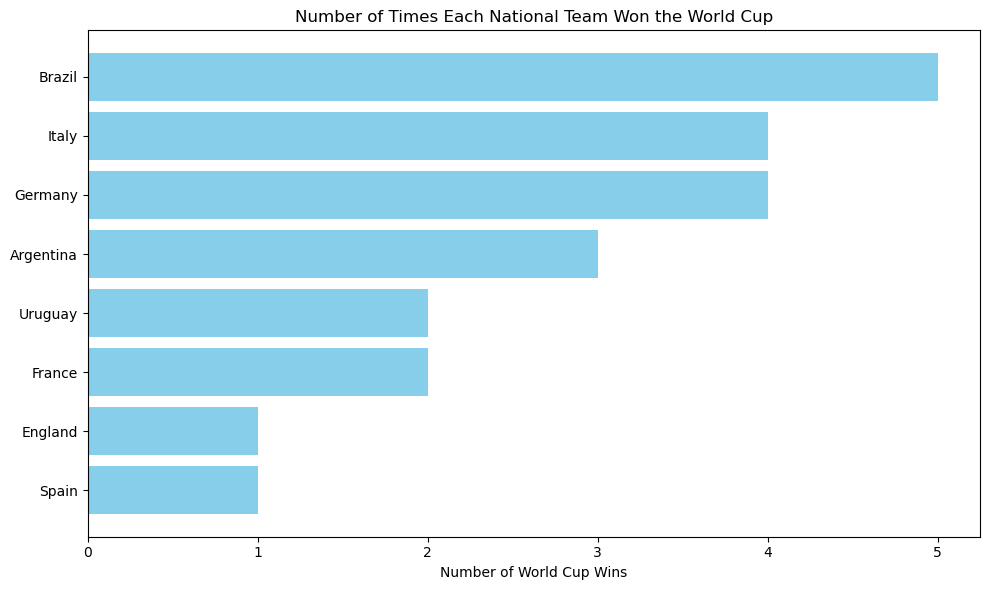

In [108]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
plt.barh(champion_counts.index[::-1], champion_counts.values[::-1], color='skyblue')
plt.xlabel("Number of World Cup Wins")
plt.title("Number of Times Each National Team Won the World Cup")
plt.tight_layout()
plt.show()

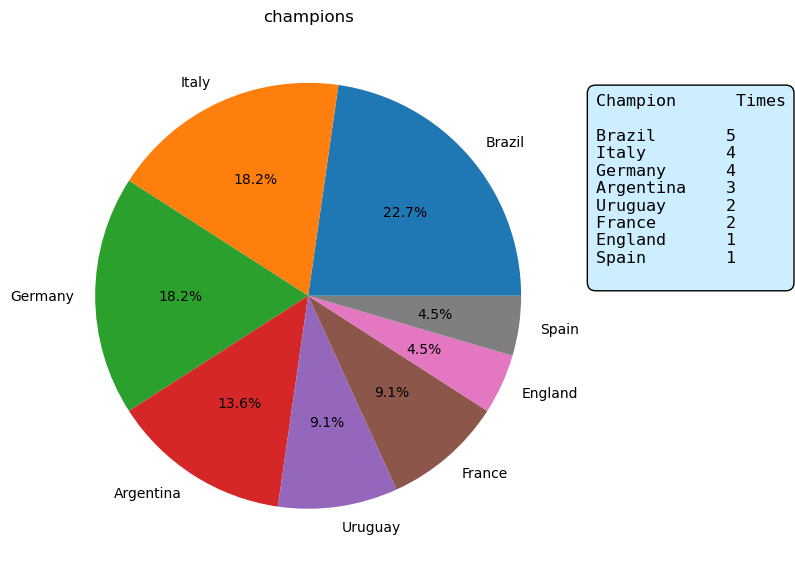

In [109]:
plt.figure(figsize=(8,8))
plt.pie(champion_counts.values, labels=champion_counts.index, autopct='%1.1f%%')
plt.title("champions")
tabla_texto = "Champion      Times\n\n"
for pais, veces in zip(champion_counts.index, champion_counts.values):
    tabla_texto += f"{pais:<12} {veces}\n"

plt.text(
    1.35, 0.95,                     # posición: más arriba y más a la derecha
    tabla_texto,
    fontsize=12,
    va='top',
    family='monospace',
    bbox=dict(
        facecolor="#CCEEFF",        # fondo celeste suave
        edgecolor="black",          # borde negro
        boxstyle="round,pad=0.5"    # bordes redondeados
    )
)


plt.tight_layout()
plt.show()

In [110]:
Finalist_counts = (pd.concat([Table_Top4['Champion'],Table_Top4['Second']]).value_counts()
)

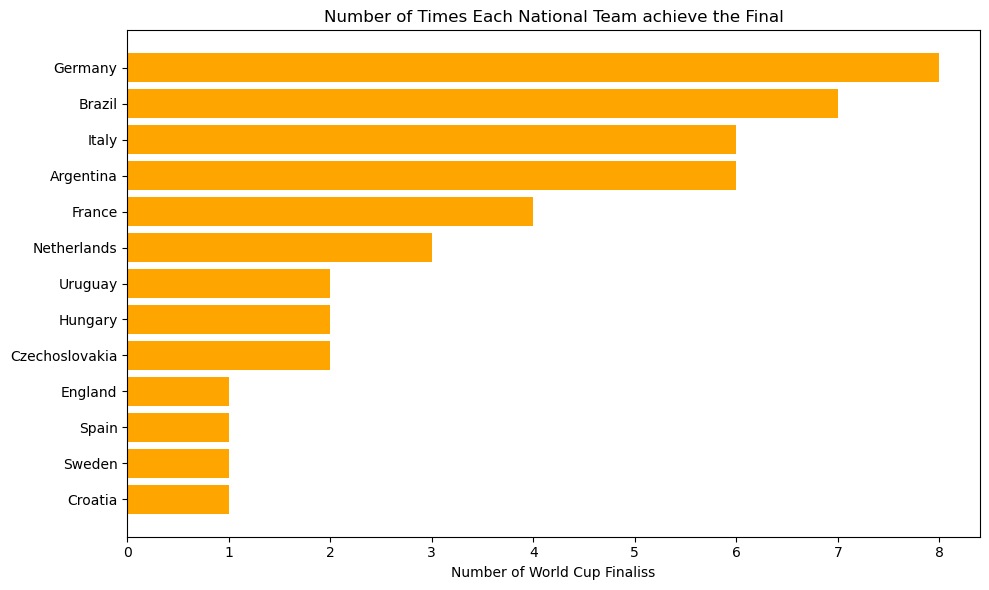

In [111]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
plt.barh(Finalist_counts.index[::-1], Finalist_counts.values[::-1], color= 'orange')
plt.xlabel("Number of World Cup Finaliss")
plt.title("Number of Times Each National Team achieve the Final")
plt.tight_layout()
plt.show()

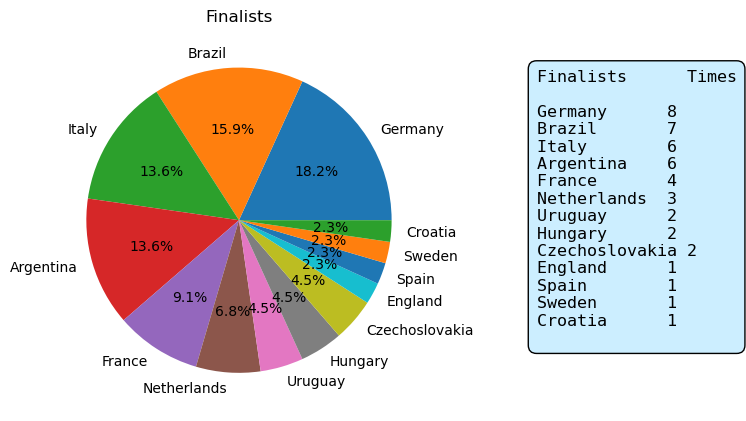

In [112]:
plt.figure(figsize=(8,8))
plt.pie(Finalist_counts.values, labels=Finalist_counts.index, autopct='%1.1f%%')
plt.title("Finalists")
tabla_texto = "Finalists      Times\n\n"
for pais, veces in zip(Finalist_counts.index, Finalist_counts.values):
    tabla_texto += f"{pais:<12} {veces}\n"

plt.text(
    1.95, 0.99,                     # posición: más arriba y más a la derecha
    tabla_texto,
    fontsize=12,
    va='top',
    family='monospace',
    bbox=dict(
        facecolor="#CCEEFF",        # fondo celeste suave
        edgecolor="black",          # borde negro
        boxstyle="round,pad=0.5"    # bordes redondeados
    )
)


plt.tight_layout()
plt.show()

#Same graph, some different senteces

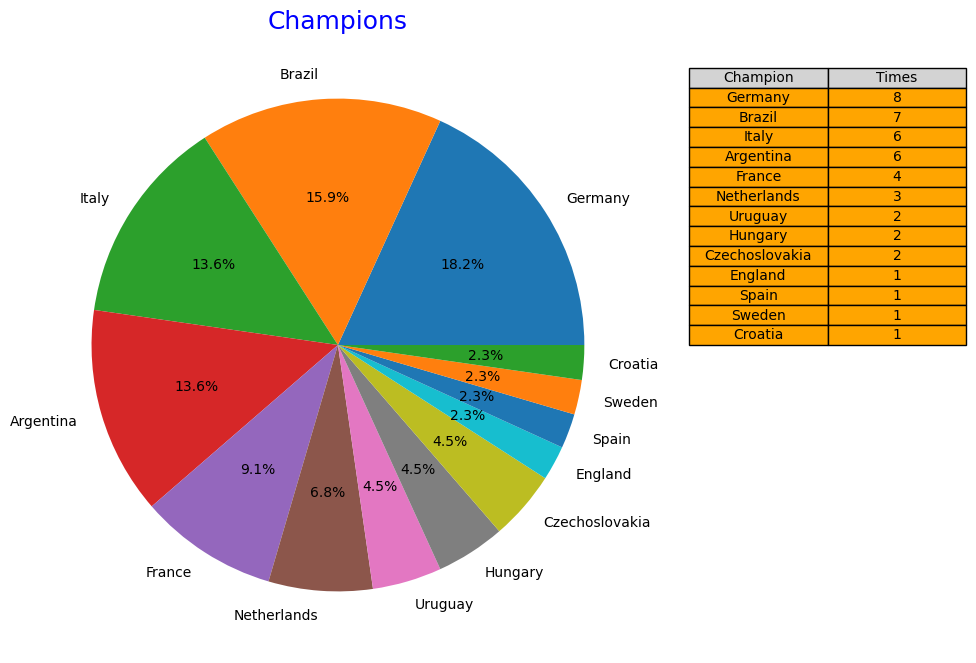

In [113]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,8))

# Pie chart
plt.pie(Finalist_counts.values, labels=Finalist_counts.index, autopct='%1.1f%%')

plt.title("Champions", fontsize=18, color='blue')

# Datos de la tabla: país y cantidad de veces que salió campeón
table_data = [[country, count] for country, count in zip(Finalist_counts.index, Finalist_counts.values)]
column_labels = ["Champion", "Times"]

# Color de fondo de todas las celdas (incluyendo encabezado)
cell_colors = [['orange', 'orange']] * len(table_data)

# Crear la tabla al lado derecho
plt.table(cellText=table_data, colLabels=column_labels, 
          cellLoc='center', colColours=['lightgray', 'lightgray'],
          cellColours=cell_colors,  # fondo naranja
          loc='upper right', bbox=[1.07, 0.50, 0.45, 0.45])  # ajustar posición

plt.show()

In [114]:
Top4_counts = (pd.concat([Table_Top4['Champion'],Table_Top4['Second'],Table_Top4['Third'],Table_Top4['Fourth']]).value_counts()
)

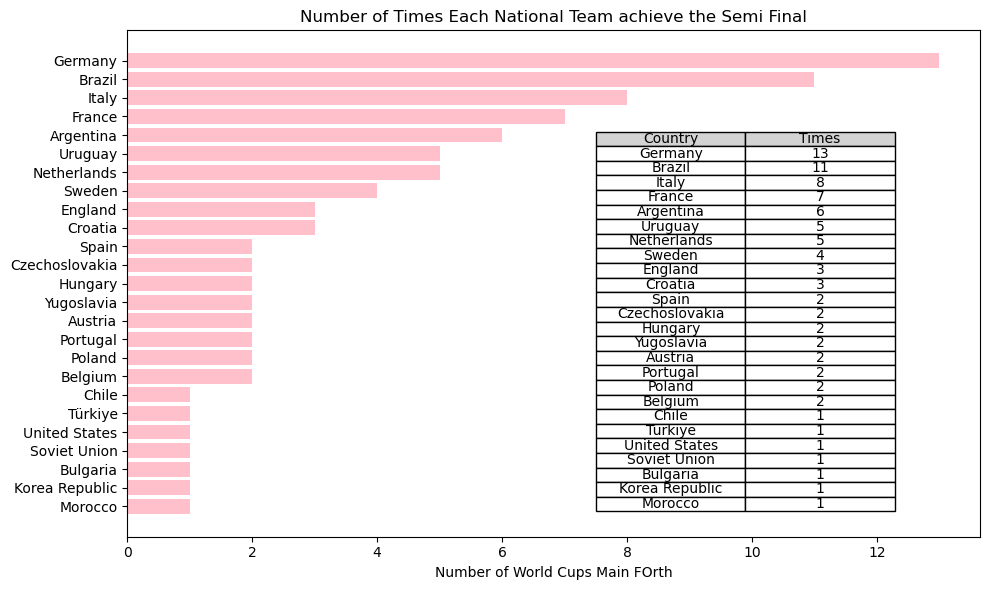

In [115]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
plt.barh(Top4_counts.index[::-1], Top4_counts.values[::-1], color= 'pink')
plt.xlabel("Number of World Cups Main FOrth")
plt.title("Number of Times Each National Team achieve the Semi Final")

cell_text = [[country, count] for country, count in zip(Top4_counts.index, Top4_counts.values)]
table = plt.table(cellText=cell_text,
                  colLabels=['Country', 'Times'],
                  colColours=['lightgray', 'lightgray'],
                  cellLoc='center',
                  bbox=[0.55, 0.05, 0.35, 0.75]) 

plt.tight_layout()
plt.show()

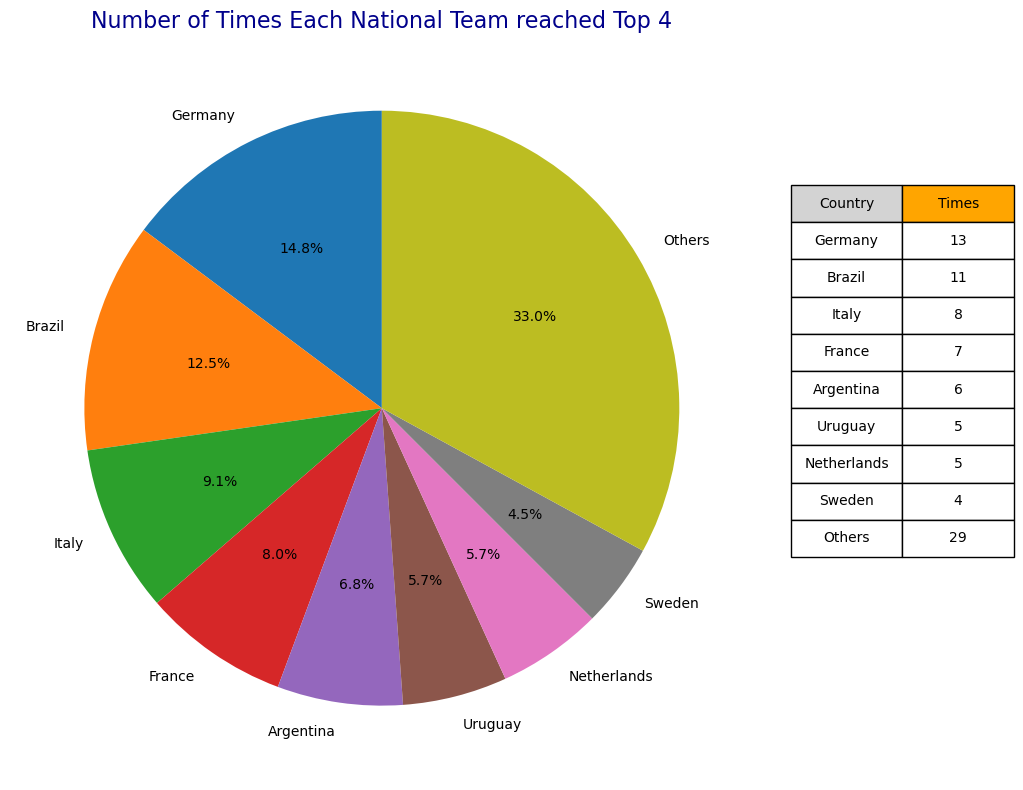

In [116]:
import matplotlib.pyplot as plt
import pandas as pd

# Definir top 8 equipos + "Others"
top_n = 8
top_teams = Top4_counts.head(top_n)
others = Top4_counts.iloc[top_n:].sum()
Top4_counts_plot = pd.concat([top_teams, pd.Series({'Others': others})])

# Crear gráfico
plt.figure(figsize=(10,8))
plt.pie(Top4_counts_plot.values, labels=Top4_counts_plot.index, autopct='%1.1f%%', startangle=90)
plt.title("Number of Times Each National Team reached Top 4", fontsize=16, color='darkblue')

# Crear tabla al lado
table_data = pd.DataFrame({
    'Country': Top4_counts_plot.index,
    'Times': Top4_counts_plot.values
})
# Tabla con fondo naranja y bordes
table = plt.table(cellText=table_data.values,
                  colLabels=table_data.columns,
                  colColours=['lightgrey','orange'],
                  cellLoc='center',
                  colLoc='center',
                  loc='right',
                  bbox=[1.05, 0.3, 0.3, 0.5])  # [x, y, ancho, alto]

plt.tight_layout()
plt.show()

#Now I create a new "Ranking table" according to points I decide to give to each National Team according to the position (in the main 4) it achieves.

In [117]:
import pandas as pd

# Inicializar diccionario para almacenar puntos por equipo
teams_points = {}

# Iterar por cada fila del Table_Top4
for idx, row in Table_Top4.iterrows():
    # Campeón → 8 puntos
    champion = row['Champion']
    teams_points.setdefault(champion, 0)
    teams_points[champion] += 8
    
    # Segundo → 4 puntos
    second = row['Second']
    teams_points.setdefault(second, 0)
    teams_points[second] += 4
    
    # Tercero → 2 puntos
    third = row['Third']
    if pd.notna(third):  # Algunas veces puede ser None
        teams_points.setdefault(third, 0)
        teams_points[third] += 2
    
    # Cuarto → 1 punto
    fourth = row['Fourth']
    if pd.notna(fourth):
        teams_points.setdefault(fourth, 0)
        teams_points[fourth] += 1

# Crear DataFrame final del ranking
ranking_main_teams = pd.DataFrame({
    'Team': list(teams_points.keys()),
    'Points': list(teams_points.values())
})

# Ordenar de mayor a menor
ranking_main_teams = ranking_main_teams.sort_values(by='Points', ascending=False).reset_index(drop=True)

ranking_main_teams

,Team,Points
0,Germany,57
1,Brazil,54
2,Italy,43
3,Argentina,36
4,France,29
5,Uruguay,19
6,Netherlands,15
7,England,10
8,Spain,9
9,Sweden,9


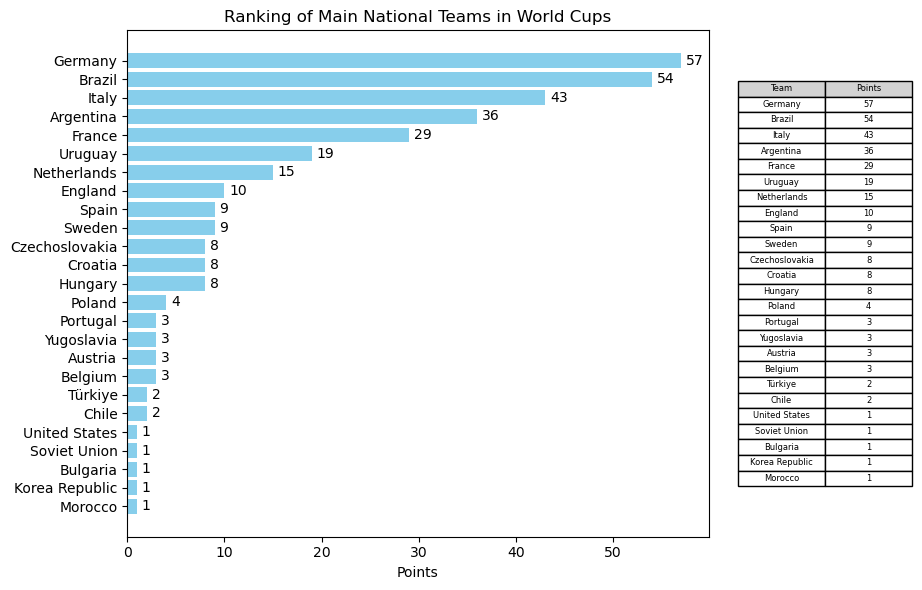

In [118]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))

# Barras horizontales
bars = plt.barh(ranking_main_teams['Team'][::-1], ranking_main_teams['Points'][::-1], color='skyblue')

# Títulos
plt.xlabel("Points")
plt.title("Ranking of Main National Teams in World Cups")

# Agregar valores al final de cada barra
for bar, value in zip(bars, ranking_main_teams['Points'][::-1]):
    width = bar.get_width()
    plt.text(width + 0.5, bar.get_y() + bar.get_height()/2, f"{value}", va='center', ha='left', fontsize=10)

# Agregar tabla al lado derecho
from matplotlib.table import Table

table_data = list(zip(ranking_main_teams['Team'], ranking_main_teams['Points']))
col_labels = ["Team", "Points"]

# Ubicar tabla al lado derecho del gráfico
plt.table(cellText=table_data, colLabels=col_labels, loc='right', cellLoc='center', colColours=['lightgrey']*2, bbox=[1.05, 0.1, 0.3, 0.8])

plt.tight_layout()
plt.show()

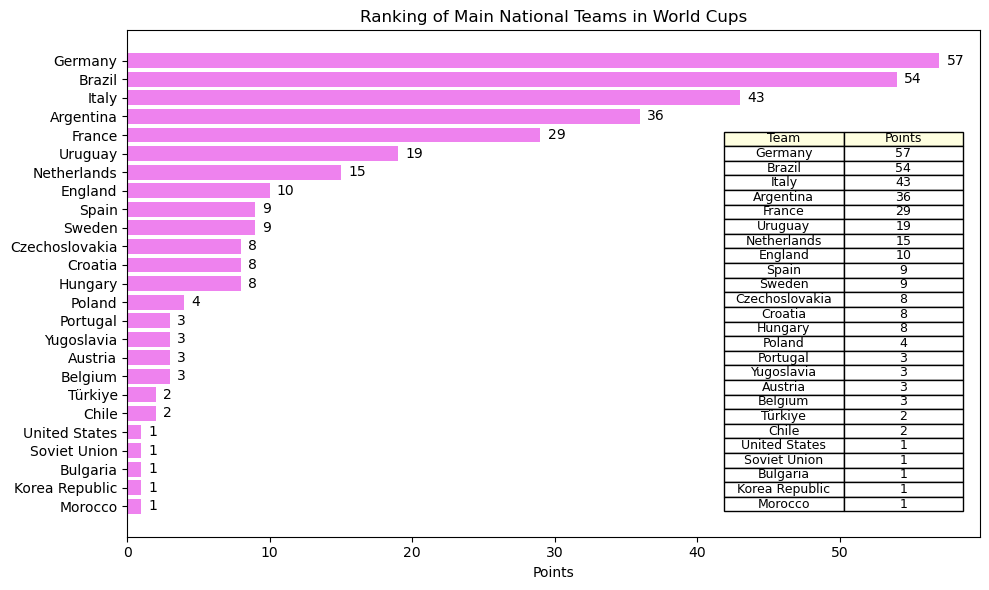

In [119]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))

# Barras horizontales en gris
bars = plt.barh(ranking_main_teams['Team'][::-1], ranking_main_teams['Points'][::-1], color='violet')

# Títulos
plt.xlabel("Points")
plt.title("Ranking of Main National Teams in World Cups")

# Agregar valores al final de cada barra
for bar, value in zip(bars, ranking_main_teams['Points'][::-1]):
    width = bar.get_width()
    plt.text(width + 0.5, bar.get_y() + bar.get_height()/2, f"{value}", va='center', ha='left', fontsize=10)

# Crear tabla dentro del gráfico
cell_text = list(zip(ranking_main_teams['Team'], ranking_main_teams['Points']))
col_labels = ["Team", "Points"]

# Ubicamos la tabla usando bbox dentro del área del gráfico
plt.table(cellText=cell_text, colLabels=col_labels, cellLoc='center', colColours=['lightyellow']*2,
          bbox=[0.7, 0.05, 0.28, 0.75])  # x, y, width, height en fracciones del gráfico

plt.tight_layout()
plt.show()

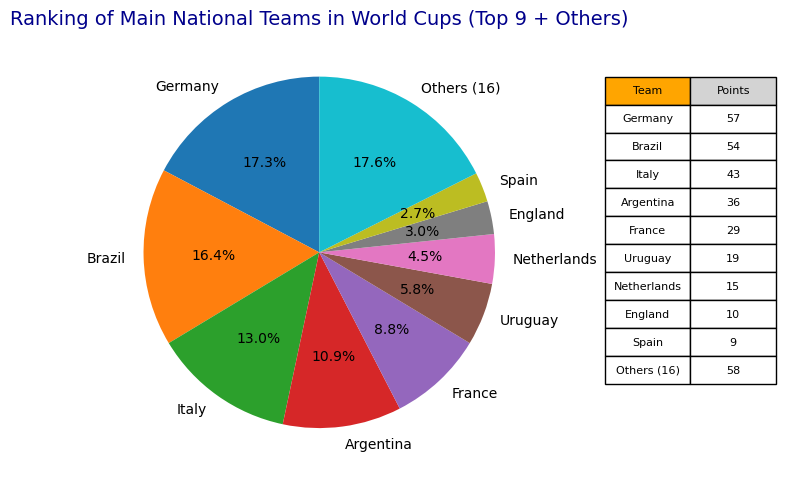

In [120]:
import matplotlib.pyplot as plt
import pandas as pd

# Definir top N
top_n = 9

# Ordenar por puntos descendente
ranking_sorted = ranking_main_teams.sort_values('Points', ascending=False)

# Top N
top_teams = ranking_sorted.head(top_n)

# Others
others_points = ranking_sorted.iloc[top_n:]['Points'].sum()
num_others = len(ranking_sorted) - top_n
others_name = f'Others ({num_others})'

# Crear Serie para el pie
pie_series = pd.Series(data=list(top_teams['Points']) + [others_points],
                       index=list(top_teams['Team']) + [others_name])

plt.figure(figsize=(8,8))

# Pie
plt.pie(pie_series.values, labels=pie_series.index,
        autopct='%1.1f%%', startangle=90, shadow=False)

plt.title("Ranking of Main National Teams in World Cups (Top 9 + Others)", fontsize=14, color='darkblue')

# Tabla al lado derecho
cell_text = list(zip(pie_series.index, pie_series.values))
col_labels = ["Team", "Points"]

plt.table(cellText=cell_text, colLabels=col_labels, cellLoc='center',
          colColours=['orange', 'lightgrey'], bbox=[1.15, 0.20, 0.39, 0.7])  # Ajusta posición y tamaño

plt.tight_layout()
plt.show()